# Machine Learning Capstone Project
##### Manish Kumar, 15th October, 2019

### TMDB box-office prediction

## 1. Data Exploration

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import sklearn
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [4]:
# Print Versions
print("sklearn version: {}".format(sklearn.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Numpy version: {}".format(np.__version__))

sklearn version: 0.19.2
Pandas version: 0.23.4
Numpy version: 1.11.3


In [5]:
# Importing training and testing data
tmdb_train=pd.read_csv("train.csv")
tmdb_test=pd.read_csv("test.csv")

In [6]:
tmdb_train.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [7]:
tmdb_test.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."


In [8]:
# Checking size of the datasets
print("Training data size: {} and Testing data size: {}".format(tmdb_train.shape,tmdb_test.shape))

Training data size: (3000, 23) and Testing data size: (4398, 22)


In [9]:
# Checking for duplicate values
sum(tmdb_train.duplicated())

0

In [10]:
tmdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [11]:
tmdb_train.drop(['belongs_to_collection','tagline','id','homepage','poster_path','overview','Keywords'],axis=1,inplace=True)

In [12]:
tmdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
budget                  3000 non-null int64
genres                  2993 non-null object
imdb_id                 3000 non-null object
original_language       3000 non-null object
original_title          3000 non-null object
popularity              3000 non-null float64
production_companies    2844 non-null object
production_countries    2945 non-null object
release_date            3000 non-null object
runtime                 2998 non-null float64
spoken_languages        2980 non-null object
status                  3000 non-null object
title                   3000 non-null object
cast                    2987 non-null object
crew                    2984 non-null object
revenue                 3000 non-null int64
dtypes: float64(2), int64(2), object(12)
memory usage: 375.1+ KB


In [13]:
tmdb_train.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,crew,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [14]:
#mdb_train.genres

In [15]:
#tmdb['genre1']=[d.get('name')  for d in tmdb.genres ]

In [16]:
tmdb_train['genres'].head(5)[1]

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"

In [17]:
tmdb_train.columns

Index(['budget', 'genres', 'imdb_id', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'title',
       'cast', 'crew', 'revenue'],
      dtype='object')

In [18]:
#tmdb_train['cast'][0]

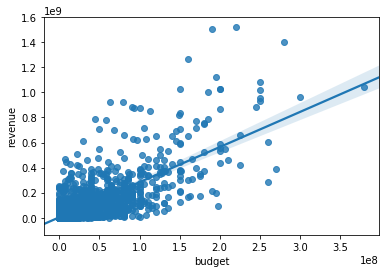

In [19]:
sb.regplot(tmdb_train['budget'],tmdb_train['revenue'])

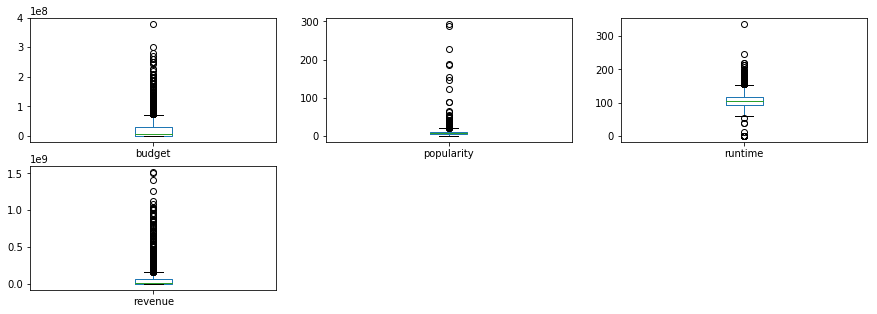

In [20]:
m=len(tmdb_train.select_dtypes(exclude='object').columns)
# print(m,m//3)
plt.figure(figsize=(15,5))
for i,col in enumerate(tmdb_train.select_dtypes(exclude='object').columns):
    plt.subplot((m//3)+1,3,i+1)
    tmdb_train[col].plot(kind='box')

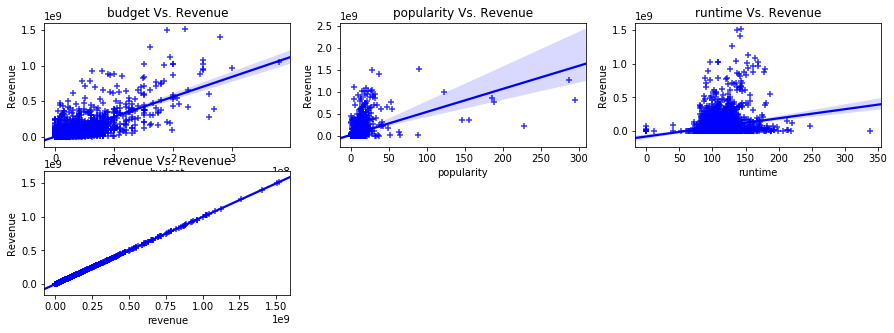

In [21]:
m=len(tmdb_train.select_dtypes(exclude='object').columns)
# print(m,m//3)
plt.figure(figsize=(15,5))
for i,col in enumerate(tmdb_train.select_dtypes(exclude='object').columns):
    plt.subplot((m//3)+1,3,i+1)
    sb.regplot(tmdb_train[col], tmdb_train.revenue, marker='+',color='b')
    plt.title('%s Vs. Revenue' % col)
    plt.xlabel(col)
    plt.ylabel('Revenue')      

In [22]:
tmdb_train.select_dtypes(exclude='object').columns

Index(['budget', 'popularity', 'runtime', 'revenue'], dtype='object')

In [23]:
tmdb_train.select_dtypes(include='object').columns

Index(['genres', 'imdb_id', 'original_language', 'original_title',
       'production_companies', 'production_countries', 'release_date',
       'spoken_languages', 'status', 'title', 'cast', 'crew'],
      dtype='object')

In [24]:
tmdb_train.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


In [25]:
tmdb_train_df=tmdb_train.select_dtypes(exclude='object')

In [26]:
tmdb_train_df.head()

,budget,popularity,runtime,revenue
0,14000000,6.575393,93.0,12314651
1,40000000,8.248895,113.0,95149435
2,3300000,64.299990,105.0,13092000
3,1200000,3.174936,122.0,16000000
4,0,1.148070,118.0,3923970


In [27]:
# db_train_df[tmdb_train_df.budget ==NaN].count()

In [28]:
tmdb_train_df[tmdb_train_df.runtime==0].count()

budget        12
popularity    12
runtime       12
revenue       12
dtype: int64

In [29]:
tmdb_train_df.drop(tmdb_train_df[pd.isnull(tmdb_train_df['runtime'])==True].index,inplace=True)

C:\ProgramData\Anaconda3\envs\ml_py3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
# Separating features and response variables
revenue=tmdb_train_df['revenue']
features=tmdb_train_df.drop('revenue',axis=1)

In [31]:
revenue.describe()

count    2.998000e+03
mean     6.677033e+07
std      1.375674e+08
min      1.000000e+00
25%      2.400517e+06
50%      1.681996e+07
75%      6.892583e+07
max      1.519558e+09
Name: revenue, dtype: float64

In [32]:
features.describe()

,budget,popularity,runtime
count,2.998000e+03,2998.000000,2998.000000
mean,2.254436e+07,8.468822,107.856571
std,3.703492e+07,12.106130,22.086434
min,0.000000e+00,0.000001,0.000000
25%,0.000000e+00,4.033052,94.000000
50%,8.000000e+06,7.388592,104.000000
75%,2.900000e+07,10.892477,118.000000
max,3.800000e+08,294.337037,338.000000


In [33]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 3 columns):
budget        2998 non-null int64
popularity    2998 non-null float64
runtime       2998 non-null float64
dtypes: float64(2), int64(1)
memory usage: 93.7 KB


In [34]:
features['popularity']=features['popularity'].astype(int)

In [35]:
#features.drop(features[pd.isnull(features['runtime'])==True].index,inplace=True)

In [36]:
features[pd.isnull(features['runtime'])==True]

,budget,popularity,runtime


In [37]:
features['runtime']=features['runtime'].astype(int)

In [38]:
features=features[['budget','popularity','runtime']].values

## 2. Data Preprocessing

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features,revenue,test_size=0.2,random_state=42)

In [40]:
#X_train=X_train.values.reshape(-1,3)

In [41]:
X_train

array([[       0,       12,       76],
       [       0,        0,       93],
       [90000000,        8,      114],
       ..., 
       [       0,        7,       96],
       [24000000,        4,      134],
       [24000000,        4,       89]], dtype=int64)

In [42]:
#X_test=X_test.values.reshape(-1,3)

## 3. Initial Model Implementation

##### Benchmark Model

In [ ]:
X_train=X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y_train=[3,2,4,1]
reg_b=linear_model.LinearRegression()
reg_b.fit(X_train,y_train)

In [ ]:
y_pred_b=reg_b.predict(X_test)

##### Model

In [ ]:
reg=linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
reg.fit(X_train,y_train)

In [ ]:
y_pred=reg.predict(X_test)

## 4. Model Evaluation

In [ ]:
def model_eval(y_true,y_pred):
    eval_score=r2_score(y_true,y_pred)
    return eval_score

In [ ]:
print("Benchmark Model Score: {}".format(model_eval(y_test,y_pred)))

In [ ]:
print("r2_score is:{}".format(model_eval(y_test,y_pred)))

In [ ]:
plt.scatter(X_test[:,0], y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 5. Model Tuning

## 6. Final Model Evaluation